### 知乎回答统计 
 - 一共爬去了1亿多条回答数据。

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

pd.options.mode.chained_assignment = None

In [49]:

def parse_date(df):
    year = str(df.year)
    month = str(df.month)
    day = str(df.day)
    if len(month) < 2:
        month = '0' + month
    if len(day) < 2:
        day = '0' + day
    return year+'-'+month+'-'+day

df_origin = pd.read_csv('data/datetime_distribution_answers.csv')
df_gender_hour = pd.read_csv('data/gender_hour_count.csv')


df_ymd = df_origin.groupby(['year','month', 'day'])['count'].sum().reset_index()
df_ymd = df_ymd[['year','month','day','count']]

#print(df)



### 近几年知乎回答数目的增长几乎是指数形式的

   year     count
0  2010      1197
1  2011    484628
2  2012    724752
3  2013   1686677
4  2014   4247352
5  2015  12627782
6  2016  16702330
7  2017  24663414
8  2018  37046797
9  2019   1979835


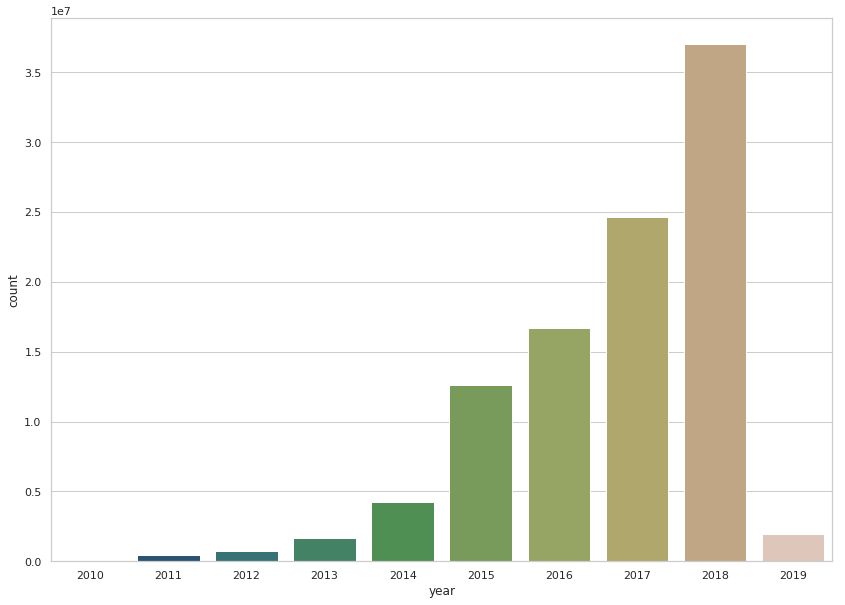

In [48]:
df_year = df_ymd.groupby(['year'])['count'].sum().reset_index()
print(df_year)
a4_dims = (14.0, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='year', y='count', data=df_year, palette="gist_earth")

In [27]:
def per_year(year):
    
    df_year= df_ymd.loc[df_ymd.year == year]
    df_year['date'] = df_year.apply(lambda x: parse_date(x) ,axis=1)
    df_date = df_year[['date', 'count']].set_index('date')
    df_date.index = pd.to_datetime(df_date.index)

    a4_dims = (30.7, 12.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    #ax.set_ylim(ymin=0)
    sns.lineplot(ax=ax, data=df_date, palette="tab10", linewidth=1.5)
    
    return df_year

### 2017年回答数情况

有 24663414 个回答 在这一年


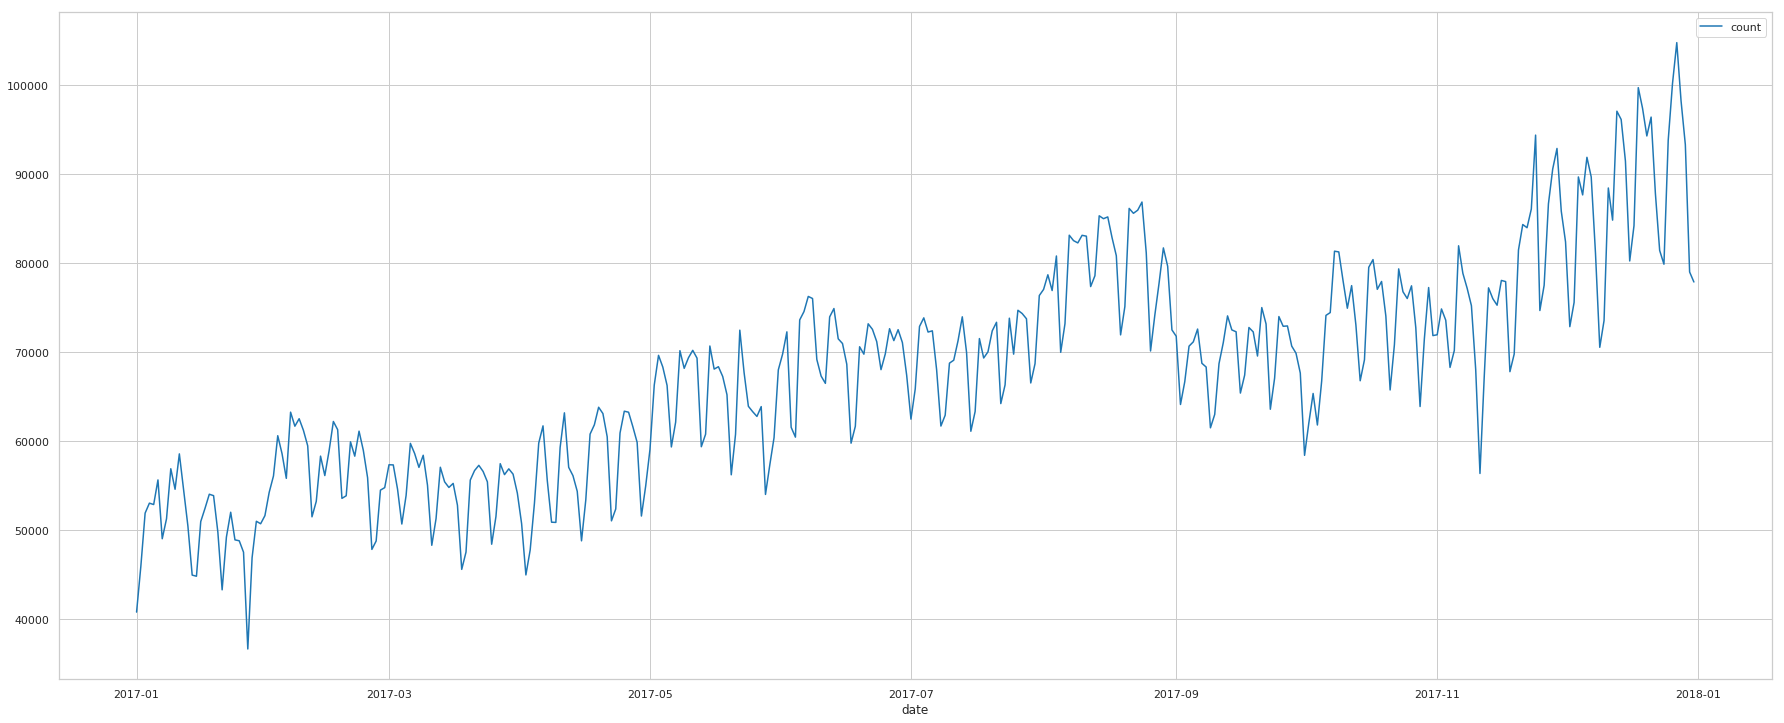

In [29]:
df_year = per_year(2017)
print('有 %s 个回答 在这一年' % df_year['count'].sum())

### 2016年回答数情况

有 16702330 个回答 在这一年


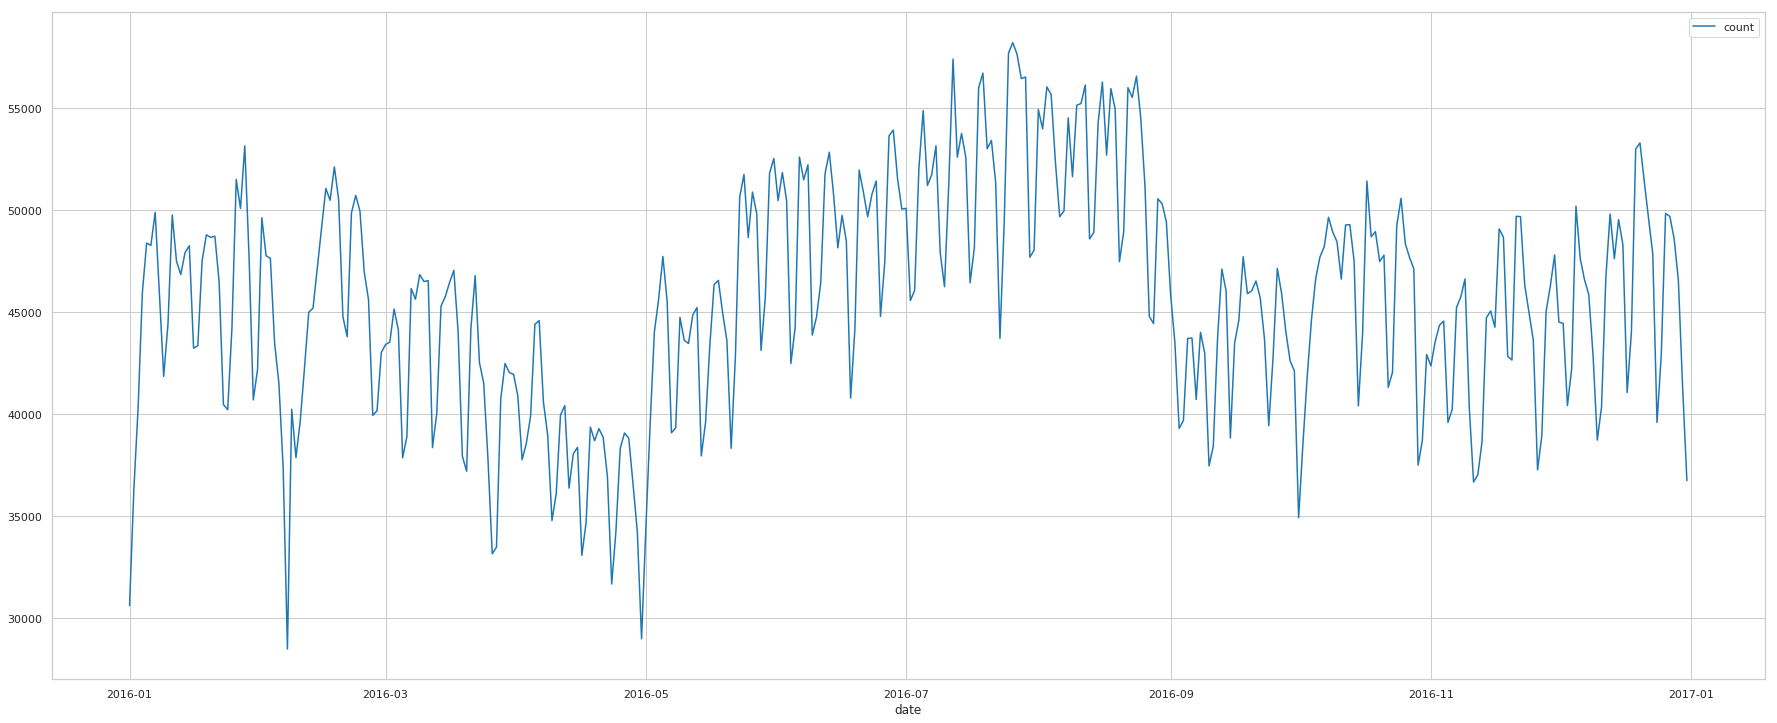

In [67]:
df_year = per_year(2016)
print('有 %s 个回答 在这一年' % df_year['count'].sum())

### 2015年回答数情况

有 12627782 个回答 在这一年


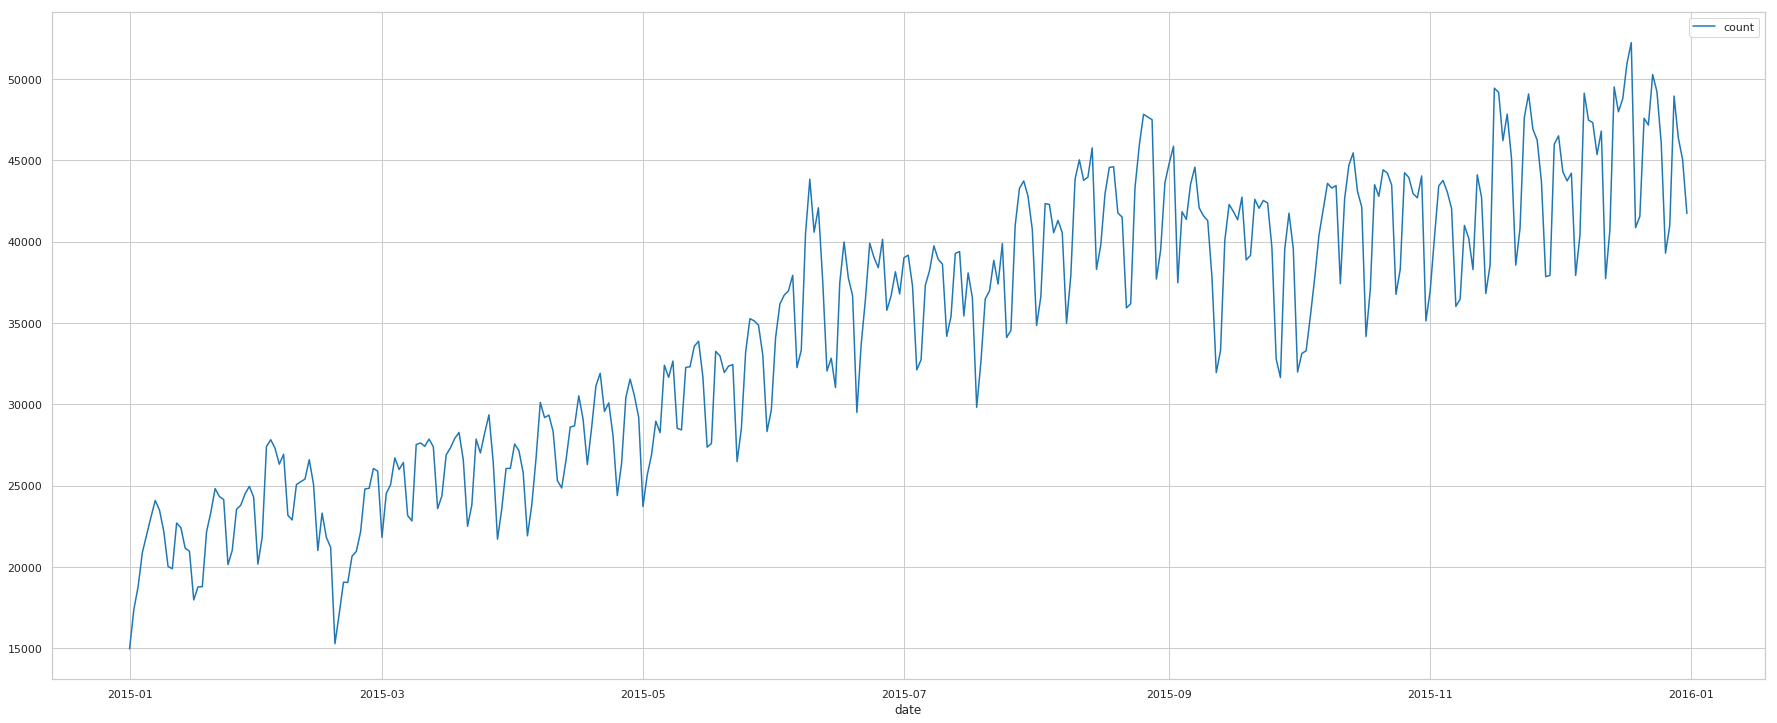

In [102]:
df_2015 = per_year(2015)
print('有 %s 个回答 在这一年' % df_2015['count'].sum())

### 2014年回答数情况

有 4247352 个回答 在这一年


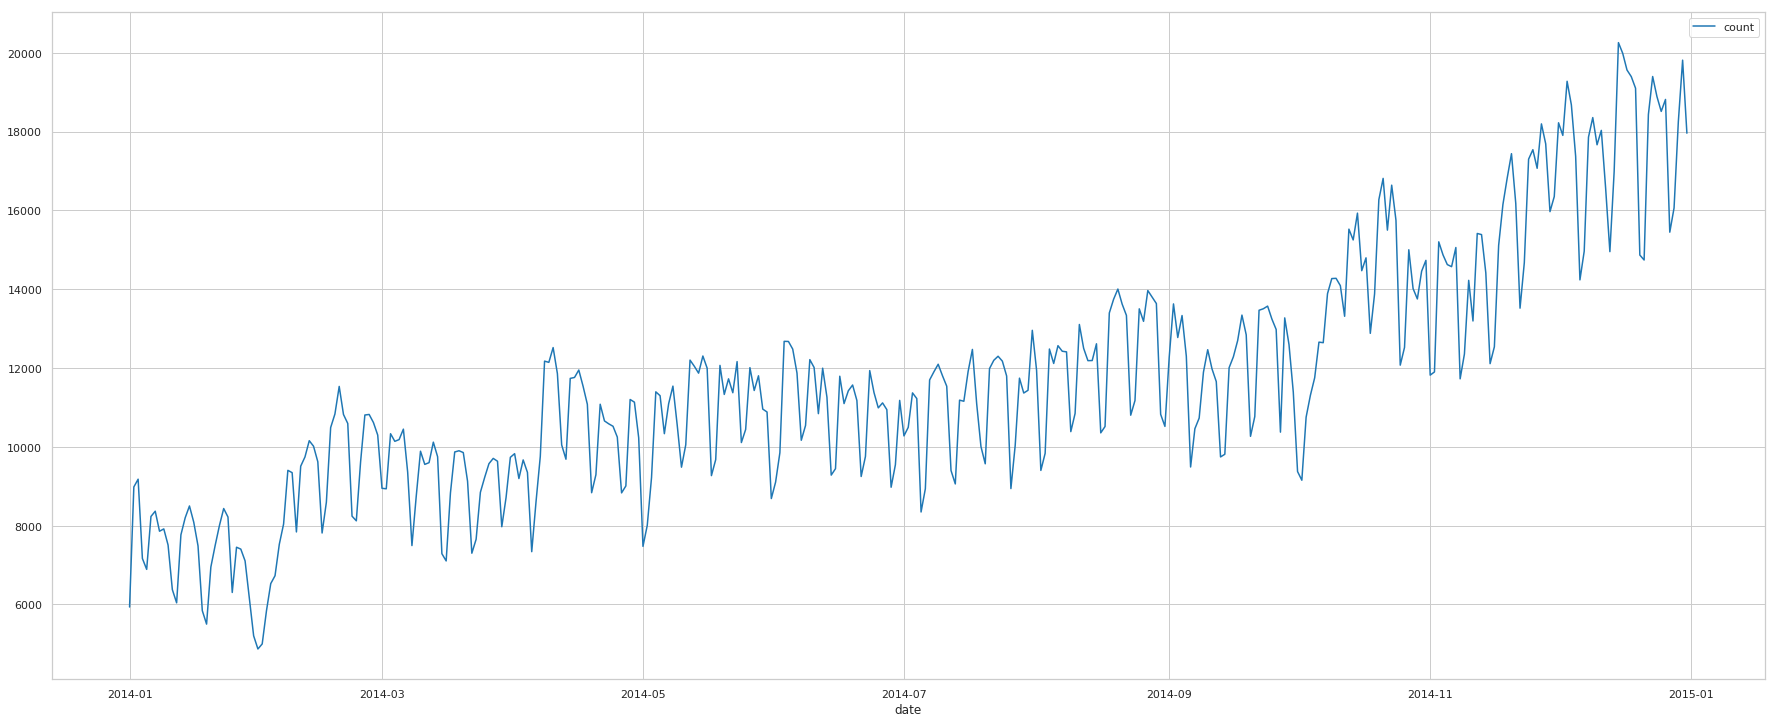

In [103]:
df_2014 = per_year(2014)
print('有 %s 个回答 在这一年' % df_2014['count'].sum())

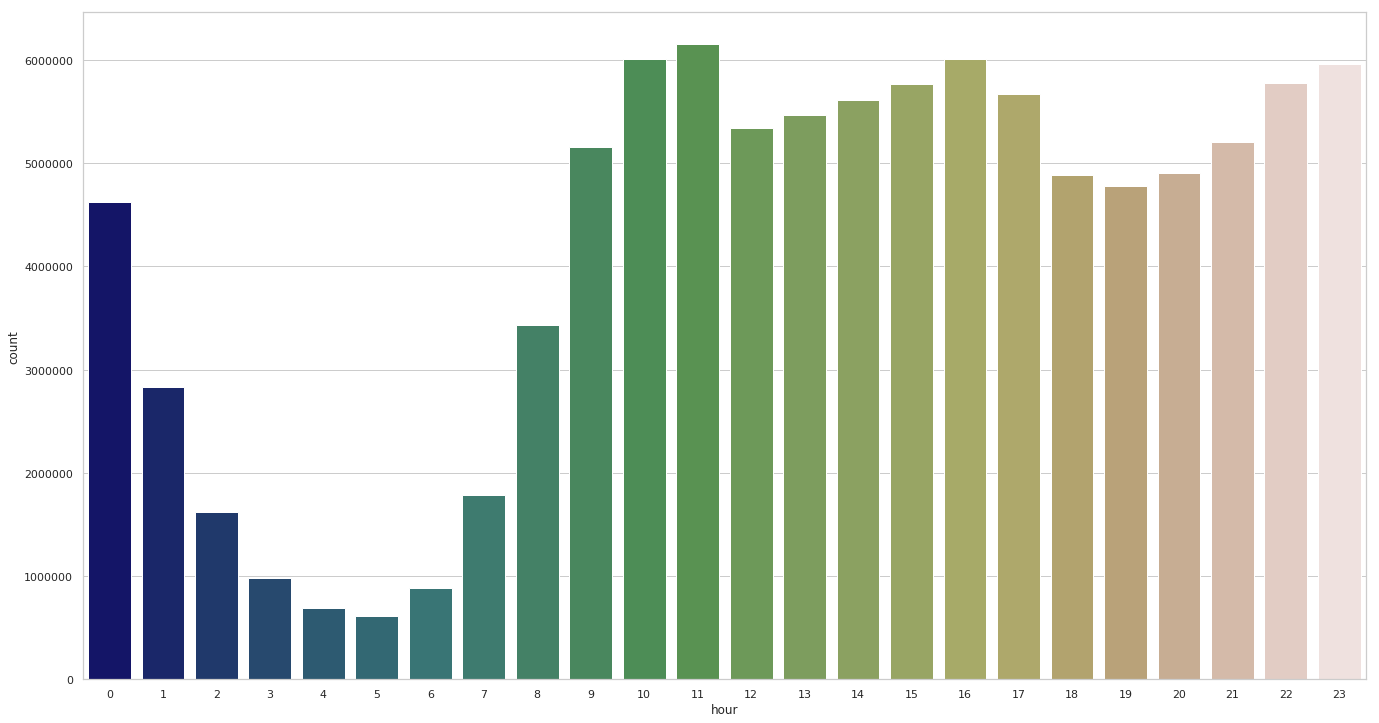

In [41]:
df_hour = df_origin.groupby(['hour'])['count'].sum().reset_index()
a4_dims = (23.0, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='hour', y='count', data=df_hour, palette="gist_earth")

### 果然是用上班时间刷知乎啊。回答的高峰期时早上11点。

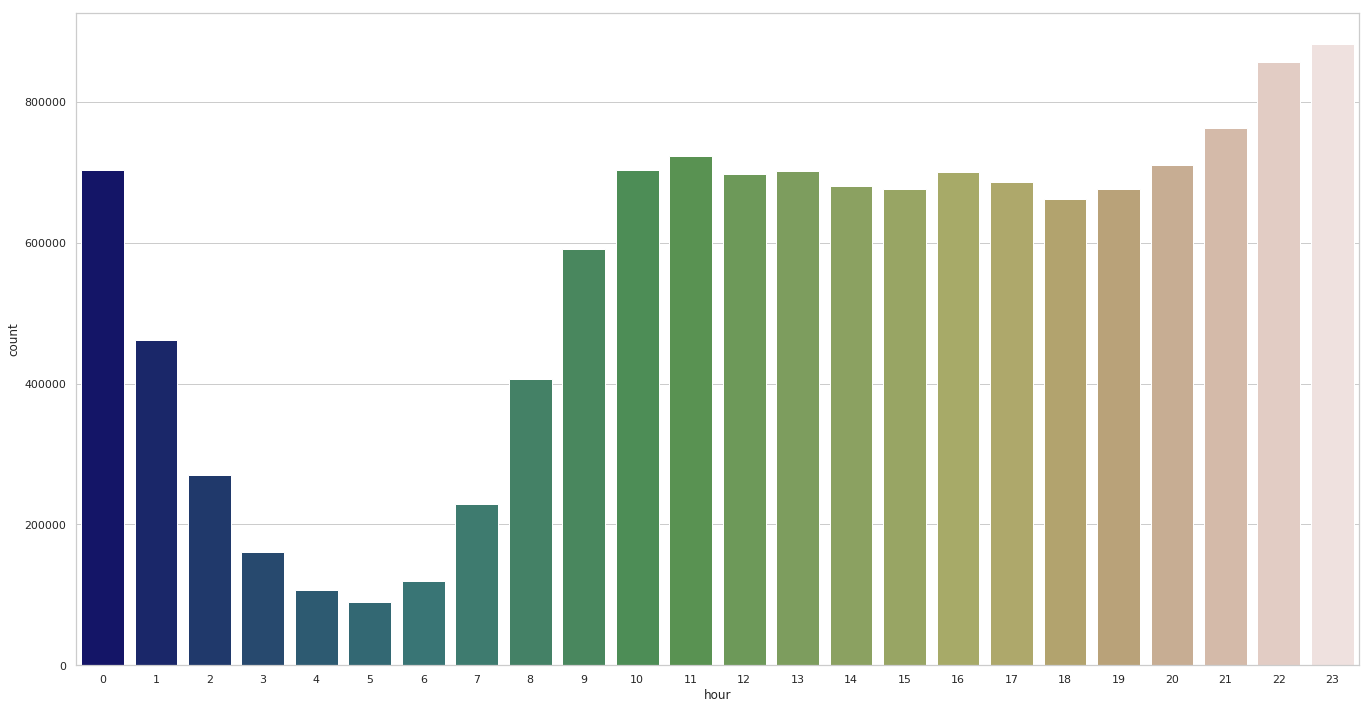

In [42]:
df_week_hour = df_origin.groupby(['weekday', 'hour'])['count'].sum().reset_index()
df_weekend_hour = df_week_hour.loc[df_week_hour['weekday'] > 5]
df_weekend_hour = df_weekend_hour.groupby(['hour'])['count'].sum().reset_index()

a4_dims = (23.0, 12)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='hour', y='count', data=df_weekend_hour, palette="gist_earth")

### 周末的话，倾向于在睡觉前回答知乎

In [24]:
df_gender_hour = df_gender_hour[['gender', 'hour', 'weekday', 'count']]

df_ghg = df_gender_hour.groupby(['gender', 'hour', 'weekday'])['count'].sum().reset_index()
df_ghgmf = df_ghg.loc[df_ghg['gender'] != -1]

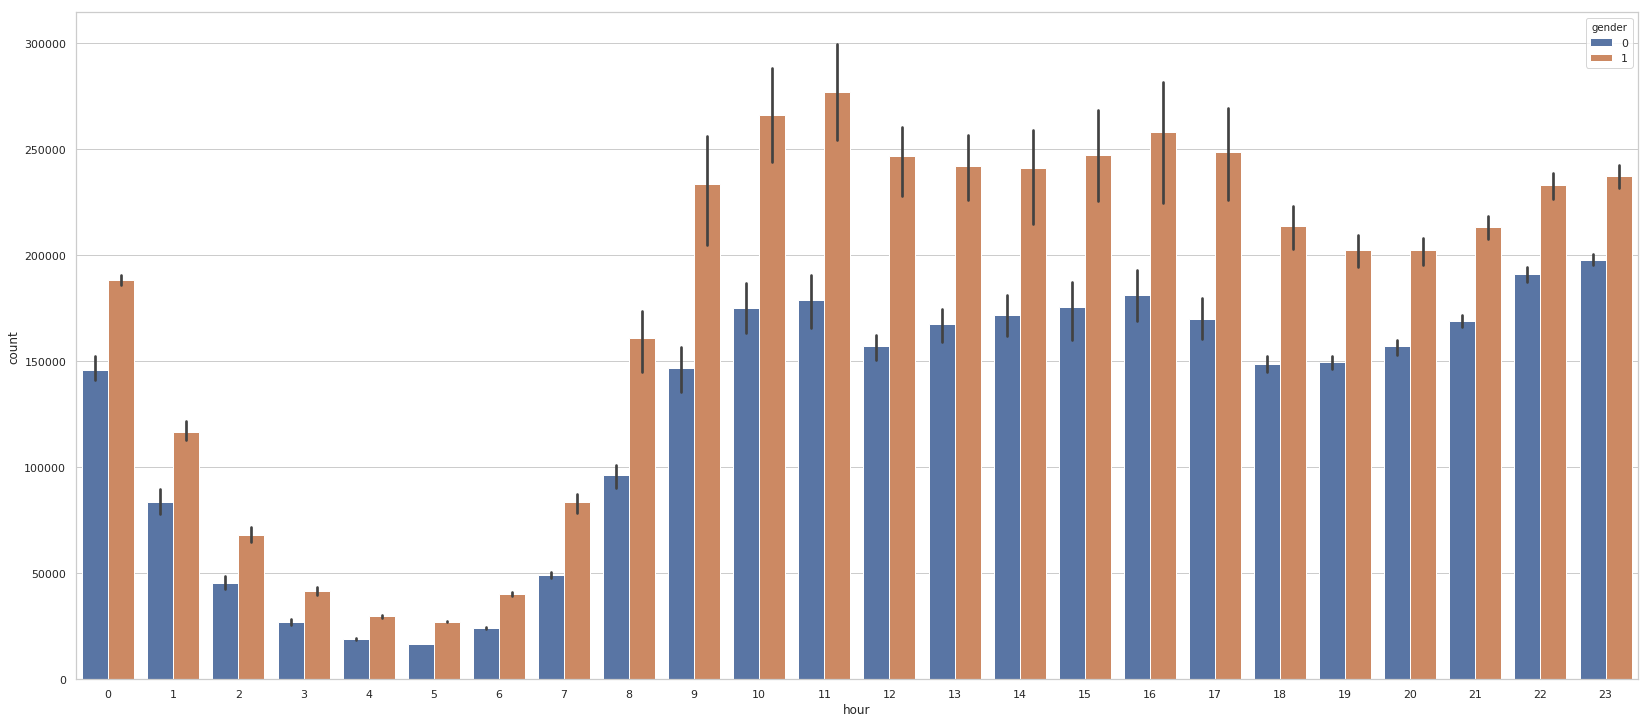

In [38]:
a4_dims = (28.0, 12.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='hour', y='count', hue="gender", data=df_ghgmf, palette=None)

### 首先，总的来说，男性用户的回答数要大于女性的回答数。  
### 男性在早上11点是回答的概率最高;   不同的是，女性用户在睡觉去回答的 概率高一点。